## Customer Segmentation using KMeans Clustering

You have a dataset with a set of customers. With this, group them into an appropriate amount of clusters in order for the marketing team to target the clusters with the right messaging to increase conversion rate.

In [2]:
#import essential libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [128]:
df.isnull().sum()

Gender                                 0
Age                                    0
Annual Income (k$)                     0
Spending Score (1-100)                 0
Income Cluster                         0
Income and Spending Score              0
Income, Spending Score, Age, Gender    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

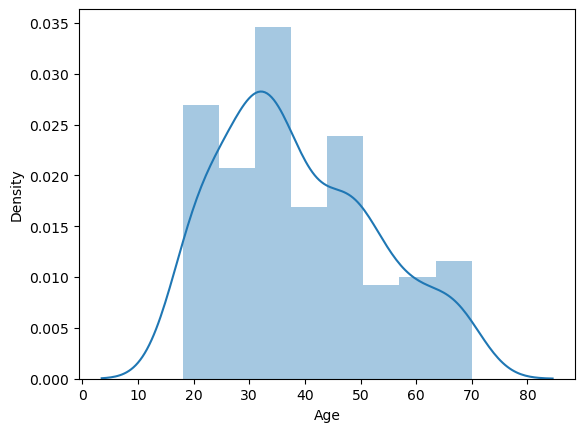

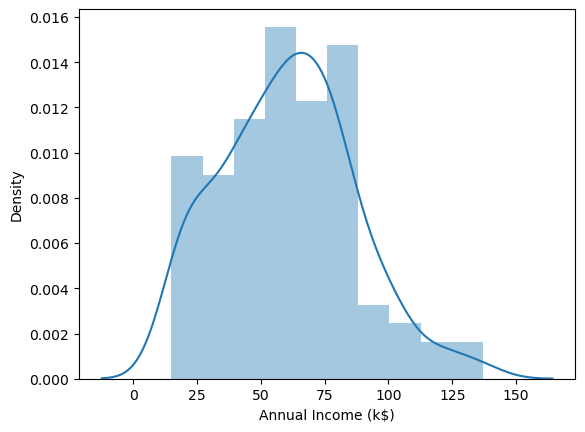

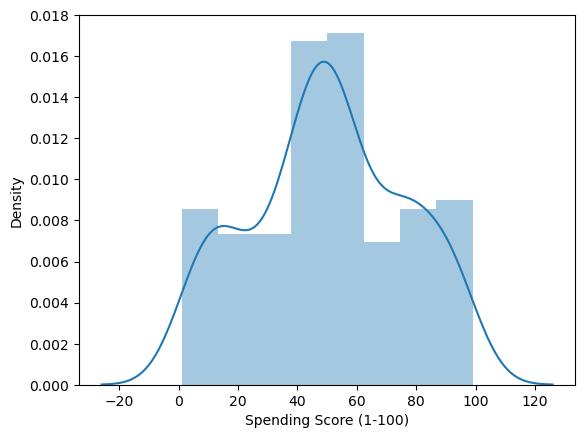

In [8]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in columns: 
    plt.figure()
    sns.distplot(df[i])

<AxesSubplot:xlabel='Age', ylabel='Density'>

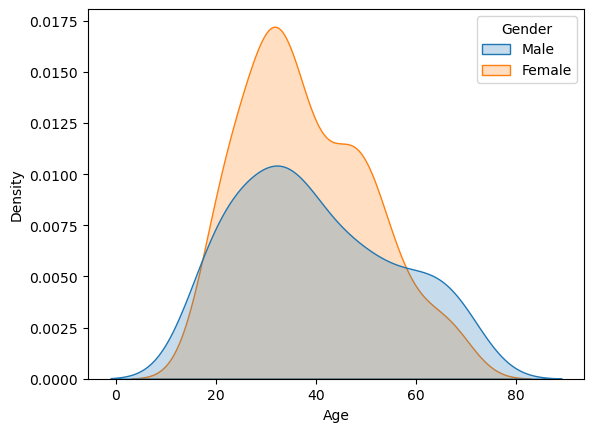

In [14]:
sns.kdeplot(df['Age'], shade=True, hue = df["Gender"])

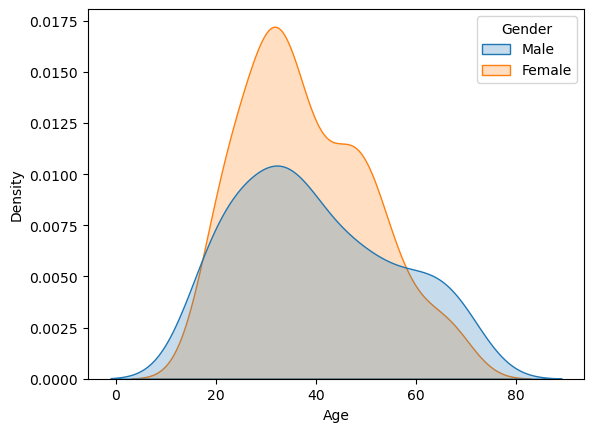

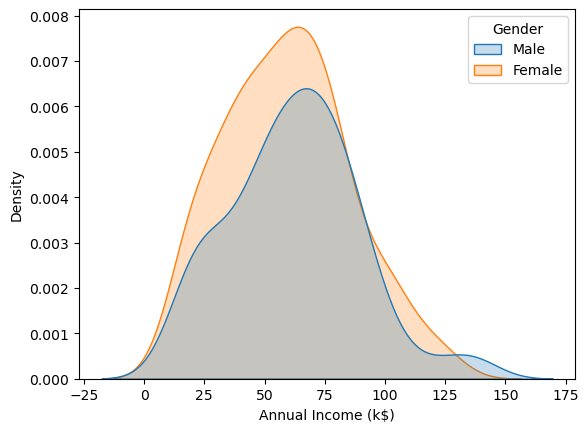

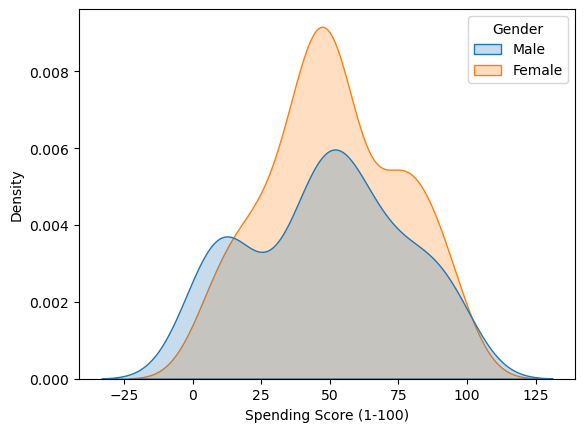

In [15]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in columns: 
    plt.figure()
    sns.kdeplot(df[i], shade=True, hue = df["Gender"])

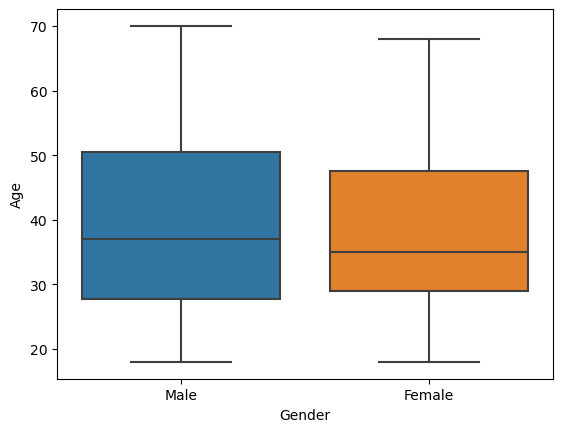

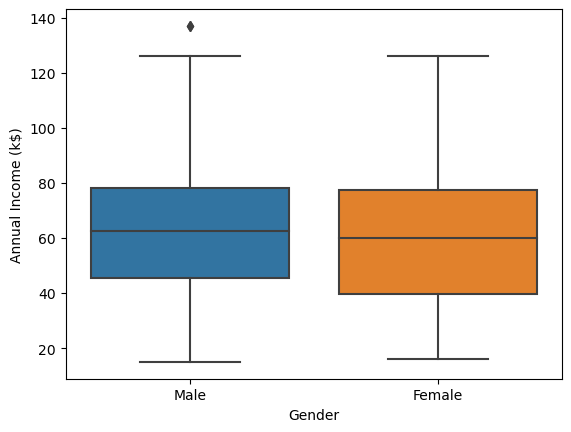

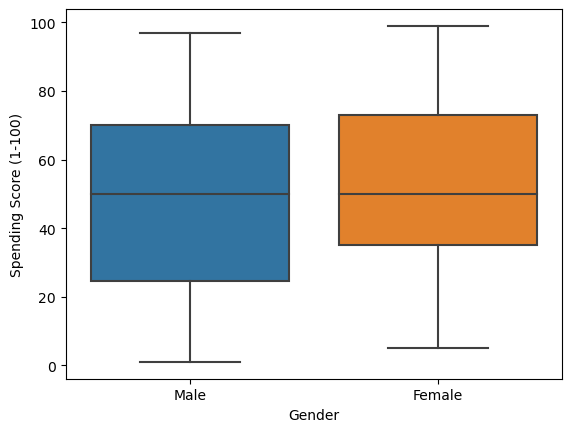

In [18]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in columns: 
    plt.figure()
    sns.boxplot(data = df, x=df["Gender"], y = df[i])

In [19]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

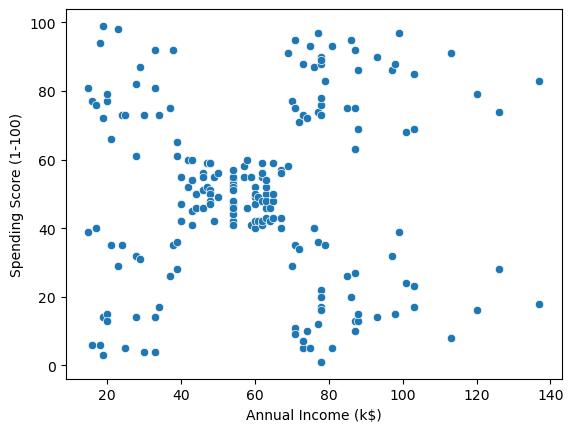

In [20]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

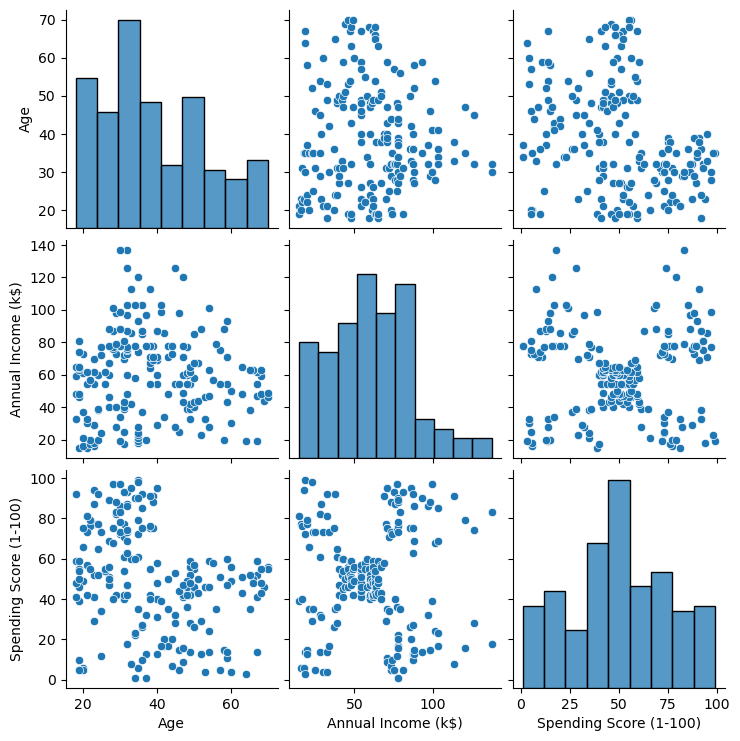

In [22]:
df = df.drop("CustomerID", axis = 1)
sns.pairplot(df)

In [23]:
df.groupby("Gender")['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

/var/folders/62/1yjqp2vn56jdb051vqfk6y2h0000gn/T/ipykernel_77902/140662339.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Gender")['Age', 'Annual Income (k$)',


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [24]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

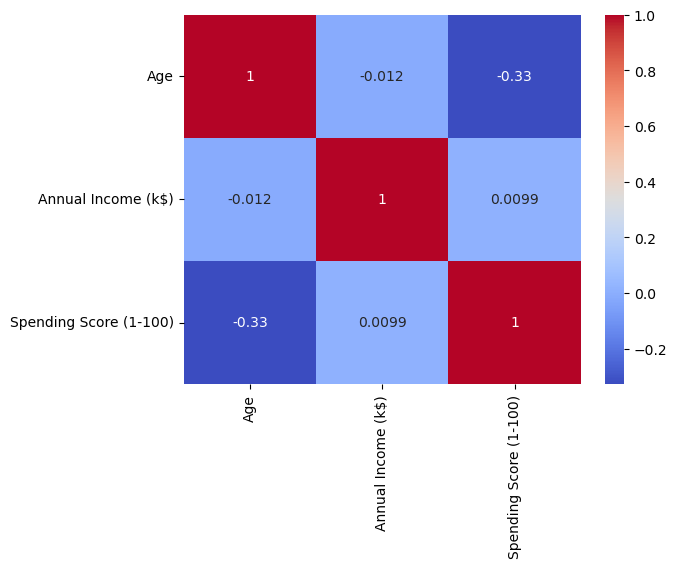

In [27]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm' )

## Clustering

### Univariate Clustering

In [34]:
clustering1 = KMeans(n_clusters = 6)

In [35]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [36]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [37]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [38]:
df["Income Cluster"].value_counts()

0    48
3    42
5    42
1    32
2    28
4     8
Name: Income Cluster, dtype: int64

In [39]:
clustering1.inertia_

5050.9047619047615

In [40]:
inertia_score = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia_score.append(kmeans.inertia_)

In [41]:
inertia_score

[137277.28000000003,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.496190476191,
 5050.9047619047615,
 3936.7968253968256,
 2822.4996947496948,
 2189.256371406371,
 1774.5010822510822]

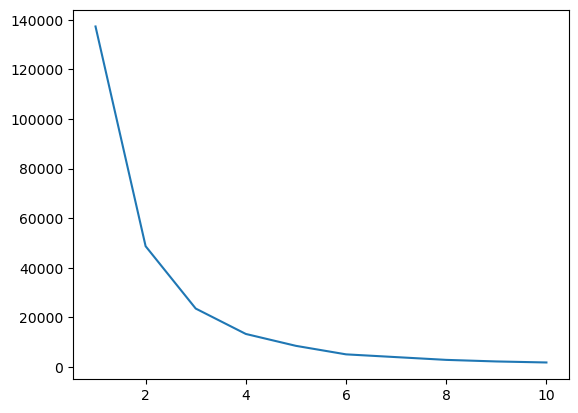

In [47]:
plt.plot(range(1,11), inertia_score)

In [49]:
clustering2 = KMeans(n_clusters = 3)
clustering2.fit(df[['Annual Income (k$)']])
df['Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [50]:
df['Income Cluster'].value_counts()

0    92
1    72
2    36
Name: Income Cluster, dtype: int64

In [51]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [52]:
#checking the stats grouped by clusters

df.groupby('Income Cluster')['Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'].mean()

/var/folders/62/1yjqp2vn56jdb051vqfk6y2h0000gn/T/ipykernel_77902/768173433.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Income Cluster')['Annual Income (k$)', 'Spending Score (1-100)',


,Annual Income (k$),Spending Score (1-100),Income Cluster
Income Cluster,,,
0,66.717391,50.054348,0.0
1,33.027778,50.166667,1.0
2,99.888889,50.638889,2.0


### Bivariate Clustering

In [129]:
clustering3 = KMeans() #creating a variable assigned to KMeans
clustering3.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']]) #fitting the data
df["Income and Spending Score"] = clustering3.labels_ #getting our clustering labels based on default 8 clusters 
df["Income and Spending Score"].value_counts() 

3    45
0    42
6    28
5    22
4    21
1    21
2    11
7    10
Name: Income and Spending Score, dtype: int64

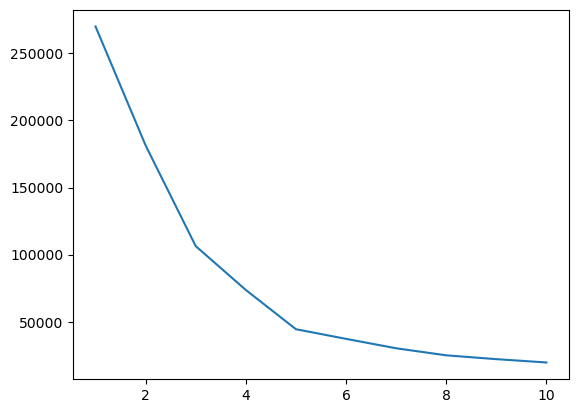

In [60]:
inertia_score3 = [] #store the scores as a list

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score3.append(kmeans.inertia_)
    
plt.plot(range(1,11),inertia_score3)

In [61]:
clustering4 = KMeans(n_clusters = 5)
clustering4.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df["Income and Spending Score"] = clustering4.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Score
0,Male,19,15,39,1,4
1,Male,21,15,81,1,2
2,Female,20,16,6,1,4
3,Female,23,16,77,1,2
4,Female,31,17,40,1,4


In [62]:
df["Income and Spending Score"].value_counts()

0    81
1    39
3    35
4    23
2    22
Name: Income and Spending Score, dtype: int64

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

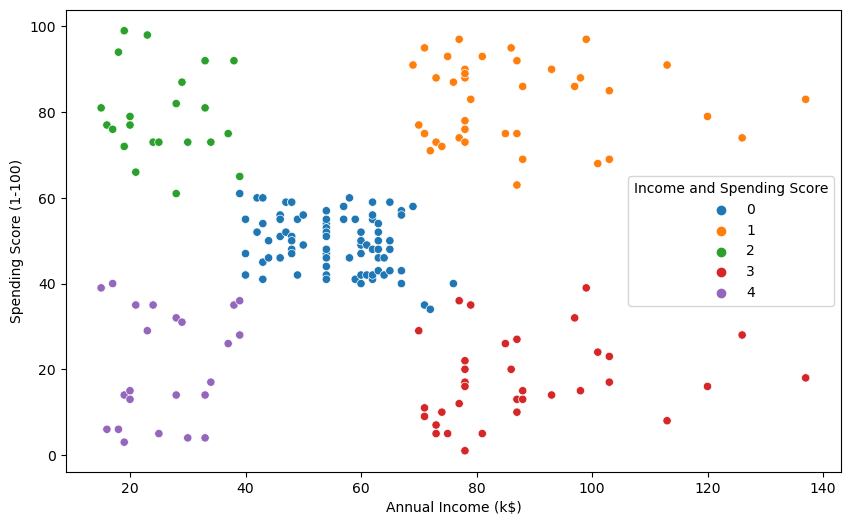

In [76]:
plt.figure(figsize = (10,6)) #changes the size of the plot
sns.scatterplot(data = df, x = 'Annual Income (k$)', y ='Spending Score (1-100)', 
                hue = 'Income and Spending Score', #changing the colour hue to make the clusters more obvious
                palette = 'tab10' )

In [85]:
pd.crosstab(df["Income and Spending Score"], df["Gender"], normalize = True)

Gender,Female,Male
Income and Spending Score,,
0,0.240,0.165
1,0.105,0.090
2,0.065,0.045
3,0.080,0.095
4,0.070,0.045


In [87]:
pd.crosstab(df["Income and Spending Score"], df["Gender"], normalize = 'index')

Gender,Female,Male
Income and Spending Score,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.590909,0.409091
3,0.457143,0.542857
4,0.608696,0.391304


In [88]:
df.groupby("Income and Spending Score")['Annual Income (k$)', 'Spending Score (1-100)',
       'Age'].mean()

/var/folders/62/1yjqp2vn56jdb051vqfk6y2h0000gn/T/ipykernel_77902/710866530.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Income and Spending Score")['Annual Income (k$)', 'Spending Score (1-100)',


,Annual Income (k$),Spending Score (1-100),Age
Income and Spending Score,,,
0,55.296296,49.518519,42.716049
1,86.538462,82.128205,32.692308
2,25.727273,79.363636,25.272727
3,88.200000,17.114286,41.114286
4,26.304348,20.913043,45.217391


### Multivariate Clustering

In [89]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Score
0,Male,19,15,39,1,4
1,Male,21,15,81,1,2
2,Female,20,16,6,1,4
3,Female,23,16,77,1,2
4,Female,31,17,40,1,4


In [97]:
df1 = pd.get_dummies(df["Gender"])
df1.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [99]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Score
0,Male,19,15,39,1,4
1,Male,21,15,81,1,2
2,Female,20,16,6,1,4
3,Female,23,16,77,1,2
4,Female,31,17,40,1,4


In [100]:
df1 = pd.concat([df, df1], axis = 1)
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Score,Female,Male
0,Male,19,15,39,1,4,0,1
1,Male,21,15,81,1,2,0,1
2,Female,20,16,6,1,4,1,0
3,Female,23,16,77,1,2,1,0
4,Female,31,17,40,1,4,1,0


In [101]:
df1.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Income and Spending Score', 'Female', 'Male'],
      dtype='object')

In [109]:
df1 = df1.drop(['Income Cluster', 'Income and Spending Score'], axis = 1)
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [120]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [121]:
df1 = ss.fit_transform(df1)

In [122]:
df1 = pd.DataFrame(ss.fit_transform(df1))
df1.head()

,0,1,2,3,4
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


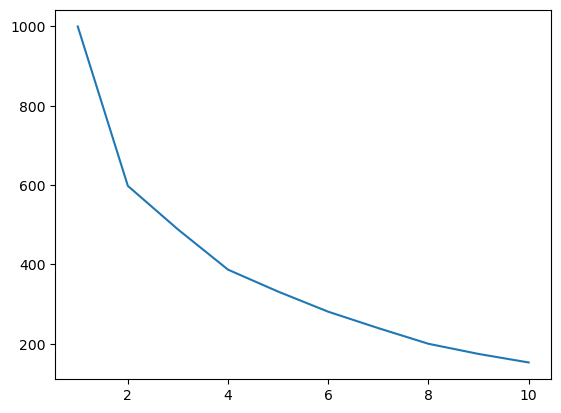

In [123]:
inertia_score4 = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df1)
    inertia_score4.append(kmeans.inertia_)
    
plt.plot(range(1,11),inertia_score4)

In [126]:
clustering5 = KMeans(n_clusters = 5)
clustering5.fit(df1)
df1["Income, Spending Score, Age, Gender"] = clustering5.labels_
df1.head()

,0,1,2,3,4,"Income, Spending Score, Age, Gender"
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152,2
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152,2
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405,3
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405,1
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405,3
